In [1]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

In [4]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")
#pipe.safety_checker = lambda images, **kwargs: (images, False)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

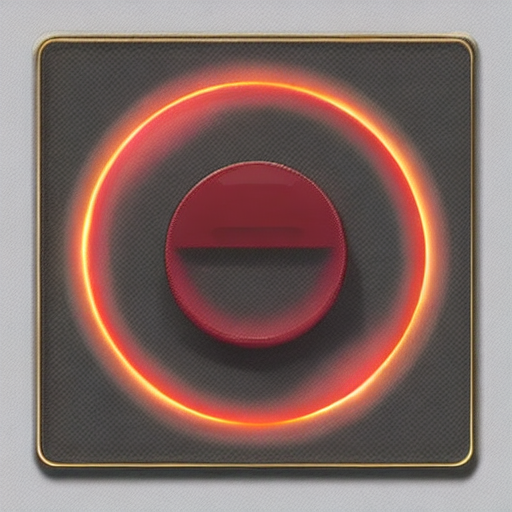

In [5]:
prompt = "square game button, thin golden frame, red glowing orb inside, pinterest, artstation, behance, ui"
image = pipe(prompt, width=512, height=512, num_inference_steps=50).images[0]
image

In [6]:
from random import SystemRandom
randr = SystemRandom()
#randr.randrange(0xFFFFFFFFFFFFFFFF)

import requests
from PIL import Image
from io import BytesIO
from math import ceil

def flex_grid(imgs, cols):
  rows=ceil(len(imgs)/cols)

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))

  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

Generating 1 of 6 with seed = 1114649897717475647


  0%|          | 0/50 [00:00<?, ?it/s]

Generating 2 of 6 with seed = 14965980907078872776


  0%|          | 0/50 [00:00<?, ?it/s]

Generating 3 of 6 with seed = 17428896535463147499


  0%|          | 0/50 [00:00<?, ?it/s]

Generating 4 of 6 with seed = 15652784784203783898


  0%|          | 0/50 [00:00<?, ?it/s]

Generating 5 of 6 with seed = 12996160883990023826


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Generating 6 of 6 with seed = 9917289133343123127


  0%|          | 0/50 [00:00<?, ?it/s]

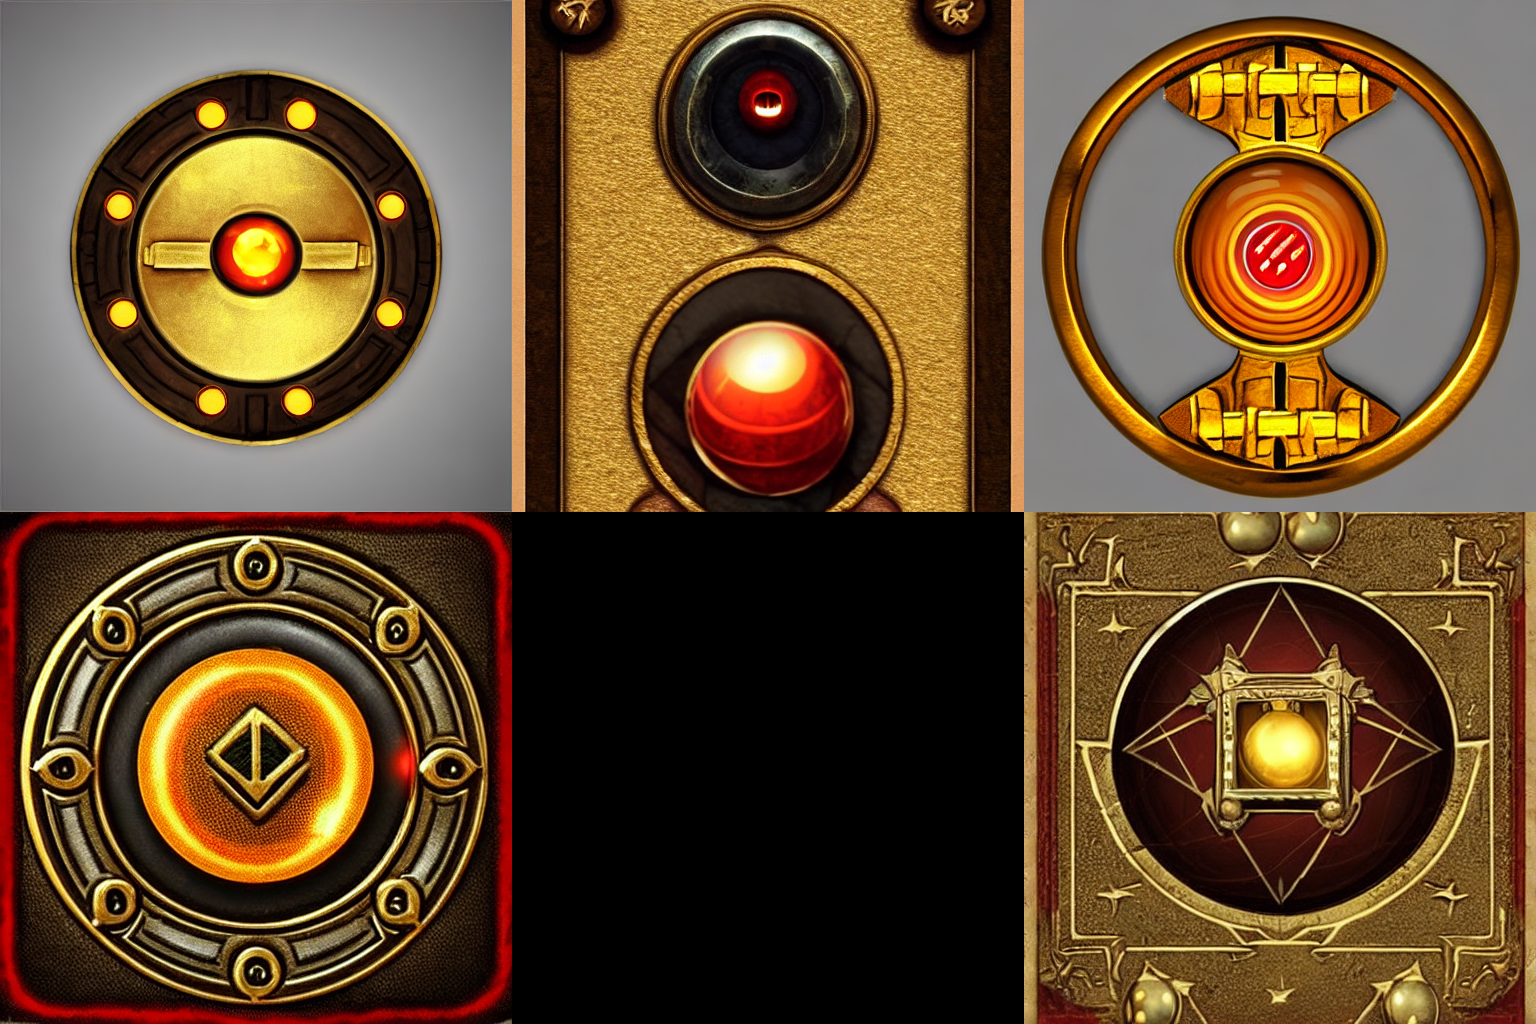

In [7]:
num_cols = 3
num_images = 6
prompt = "medieval game button, thin golden frame, red glowing orb inside, pinterest, artstation, behance, ui"

images = []
for i in range(num_images):
  seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
  print(f'Generating {i + 1} of {num_images} with seed = {seed}')
  generator = torch.Generator("cuda").manual_seed(seed)
  images.extend(pipe(prompt, generator=generator).images)
grid = flex_grid(images, cols=num_cols)
grid

In [10]:
import gc
del grid
del images
del image
del pipe
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   2070 MiB |   5334 MiB |   3212 GiB |   3210 GiB |
|       from large pool |   1996 MiB |   5184 MiB |   3149 GiB |   3147 GiB |
|       from small pool |     74 MiB |    155 MiB |     63 GiB |     63 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   2070 MiB |   5334 MiB |   3212 GiB |   3210 GiB |
|       from large pool |   1996 MiB |   5184 MiB |   3149 GiB |

In [8]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   4723 MiB |   5334 MiB |   3212 GiB |   3208 GiB |
|       from large pool |   4574 MiB |   5184 MiB |   3149 GiB |   3144 GiB |
|       from small pool |    148 MiB |    155 MiB |     63 GiB |     63 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   4723 MiB |   5334 MiB |   3212 GiB |   3208 GiB |
|       from large pool |   4574 MiB |   5184 MiB |   3149 GiB |